# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=1' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:02, 9322801.90it/s]                               


Extracting /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 175627.14it/s]           
0it [00:00, ?it/s]

Extracting /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 5353397.10it/s]                             
0it [00:00, ?it/s]

Extracting /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw


8192it [00:00, 34750.82it/s]            

Extracting /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/laura/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


Here we can see one of the images.

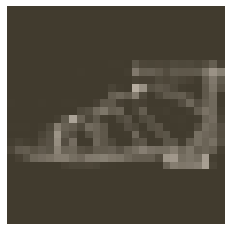

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [13]:
# Defining a neural net with 1 input layer, 2 hidden layers,1 output layer
# input Layer:    784 by 256 
# Hidden Layer 1: 256 by 128
# Hidden Layer 1: 128 by 64 
# Output Layer:   64  by 10 ( 10 classes )

class MnistFashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.out = nn.Linear(64,10)
        
    def forward(self, x):
        """ 
        Forward pass
        """
        
        # Validate the tensor has been flatten
        x = x.view(x.shape[0], -1)
        
        # Apply ReLU after each fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # Apply softmax as activation function for the last layer 
        x = F.log_softmax(self.out(x), dim = 1)
    
        return x 

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [14]:
# Create the model 
model = MnistFashion()

In [15]:
# Criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [16]:
# Training for 10 epochs 
epochs = 10

for epoch in range(epochs):
    running_loss = 0 
    for images,labels in trainloader:
        
        # Forward pass
        output = model(images)
        # Loss 
        loss = criterion(output, labels)
        
        # Refresh gradients 
        optimizer.zero_grad()
        
        # Do a backward pass 
        loss.backward()
        # Update the weights applying the optimizer step 
        optimizer.step()

        running_loss += loss.item()

    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.7637419567497046
Training loss: 0.4626960344692029
Training loss: 0.41757062015566493
Training loss: 0.3913159045789923
Training loss: 0.37113512325674486
Training loss: 0.3552039501302913
Training loss: 0.34188187208129905
Training loss: 0.33030720343436004
Training loss: 0.3198198757843295
Training loss: 0.31008480960276846


tensor([[7.0052e-05, 4.6588e-05, 2.2125e-04, 3.4072e-06, 2.2704e-04, 9.9837e-01,
         1.0454e-04, 8.7608e-04, 7.4331e-05, 3.8942e-06]])


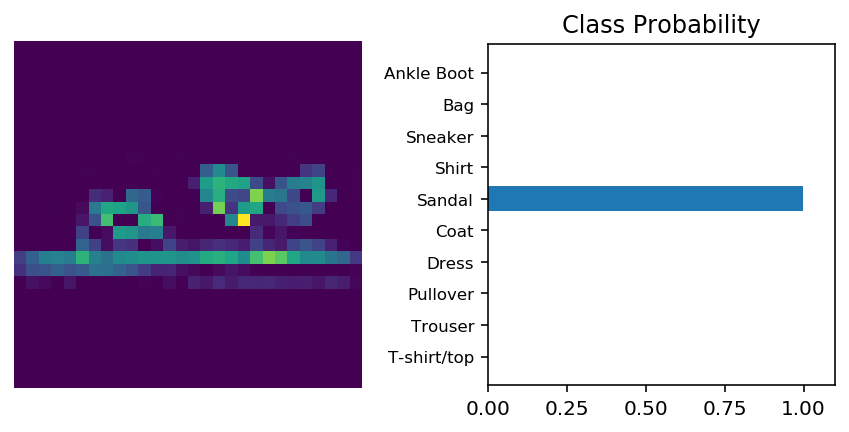

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0] # grab an image 
# Convert 2D image to 1D vector
#img = img.resize_(1, 784) 

# Calculate the class probabilities (softmax) for img
with torch.no_grad(): # turn off the gradients as they are not need it in testing
    logits = model(img) 

# Get the probabilities by class    
probabilities = F.softmax(logits, dim=1)
print(probabilities)
# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), probabilities, version='Fashion')